In [5]:
# ==============================================
# Tutorial 1: Introduction to Google Colab & Python Basics
# DSAI5102 - Principles of Data Science
# ==============================================
# Learning Goals:
# 1. Learn how to use Google Colab
# 2. Review Python basics (variables, data structures, functions, loops)
# 3. Practice reading data with pandas
# 4. Create simple visualizations with matplotlib and seaborn
# ==============================================

### Part 0. Preparation

In [3]:
# Example: installing seaborn (Colab has it pre-installed, but this shows how pip works)
!pip install seaborn

In [4]:
# Upload from Local Computer

from google.colab import files

# This will open a file picker. Select a local CSV file to upload.
uploaded = files.upload()

# # Once uploaded, you can load it with pandas (replace filename with your file’s name)
# import pandas as pd
# df = pd.read_csv("your_file.csv")
# df.head()


KeyboardInterrupt: 

In [6]:
# Load Data Directly from a URL
# Example: Iris dataset from seaborn repo
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_url = pd.read_csv(url)

In [7]:
# Mount Google Drive

from google.colab import drive

# This will ask for permission to access your Google Drive
drive.mount('/content/drive')
# Example: reading a file stored in your Drive
path = "/content/drive/MyDrive/DSAI_5102/1_class_250905Fri/2_data/1_iris.csv"
df_drive = pd.read_csv(path)

MessageError: Error: credential propagation was unsuccessful

---

### Part 1. Getting Started with Colab

In [8]:
# Let's run our very first Python code in Colab
print("Hello, DSAI5102! 🚀")

Hello, DSAI5102! 🚀


Exercise: Modify the above code to print your own name.

In [9]:
# Example:
print("Hello, my name is Alice!")

Hello, my name is Alice!


---

### Part 2. Python Basics

Variables and Data Types

In [10]:
# Numbers
x = 42             # integer
y = 3.14           # float

# Strings
name = "Alice"

# Lists (ordered collection)
fruits = ["apple", "banana", "cherry"]

# Dictionaries (key-value pairs)
student = {"name": "Alice", "age": 21, "major": "Data Science"}

print(x, y, name, fruits, student)

42 3.14 Alice ['apple', 'banana', 'cherry'] {'name': 'Alice', 'age': 21, 'major': 'Data Science'}


Loops and Conditions

In [11]:
# For loop
for i in range(5):
    print("Iteration:", i)

# If-else statement
score = 85
if score >= 90:
    print("Grade: A")
elif score >= 80:
    print("Grade: B")
else:
    print("Grade: C or lower")

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Grade: B


Functions

In [12]:
# Defining a function
def square(x):
    return x * x

print("Square of 5 is:", square(5))

Square of 5 is: 25


---

### Part 3. Reading Data with Pandas

In [13]:
import pandas as pd

# Load example dataset: Iris flower dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


# setosa, versicolor, virginica -> Iris's species
# sepal_length	sepal_width	petal_length	petal_width	-> Iris's features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Inspect dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---

### Part 4. Data Visualization

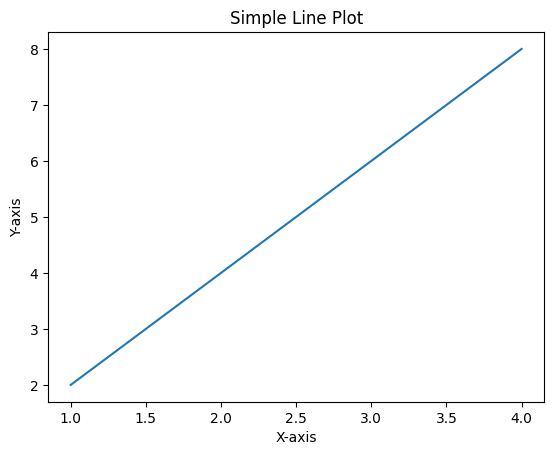

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot example
plt.plot([1, 2, 3, 4], [2, 4, 6, 8])
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

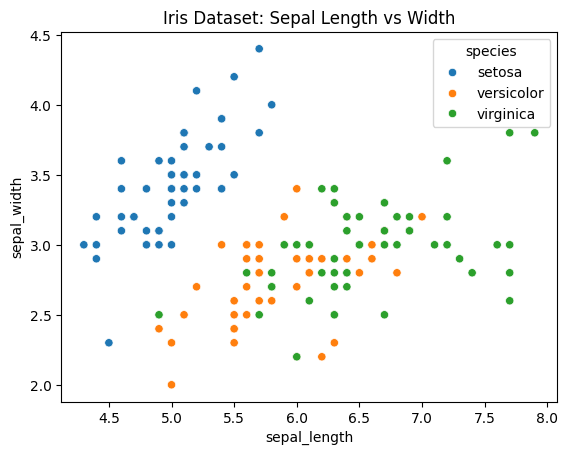

In [17]:
# Scatterplot with seaborn
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Iris Dataset: Sepal Length vs Width")
plt.show()

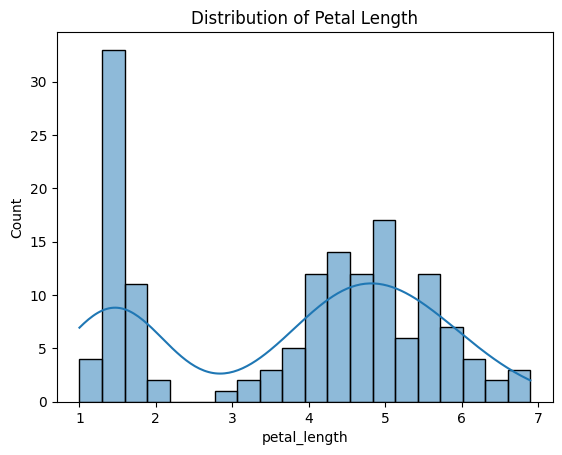

In [18]:
# Histogram with seaborn
sns.histplot(df["petal_length"], bins=20, kde=True)
plt.title("Distribution of Petal Length")
plt.show()

---

### Part 5. A Taste of Data Science Methods

So far, we have learned how to load and explore data.  
Now let’s take a quick look at a **real machine learning method**: classification using Support Vector Machine (SVM).

We will use the Iris dataset and try to classify flowers by their species.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0


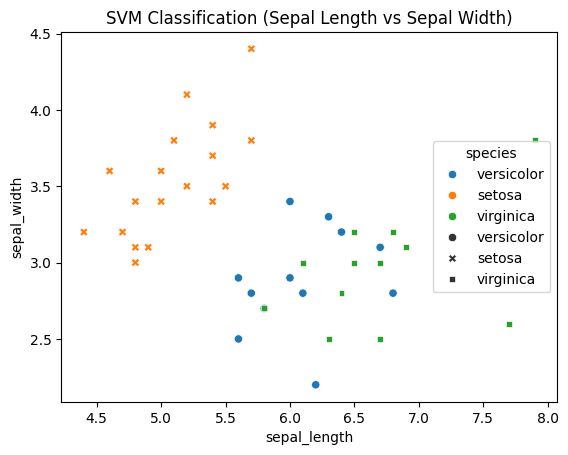

In [20]:
# Optional: visualize decision boundaries (using only 2 features for clarity)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_test["sepal_length"], y=X_test["sepal_width"], hue=y_pred, style=y_test)
plt.title("SVM Classification (Sepal Length vs Sepal Width)")
plt.show()

---

### Part 6. Mini Project

Task:

	1.	Upload a dataset of student grades (or use any CSV you find online).

	2.	Read it with pandas.

	3.	Compute a simple statistic (mean score, maximum score, etc.).

	4.	Plot the grade distribution as a histogram.

In [ ]:
# Example workflow:
grades = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Score": [88, 92, 79, 85]
})

print("Average score:", grades["Score"].mean())

sns.histplot(grades["Score"], bins=5, kde=True)
plt.title("Grade Distribution")
plt.show()

---

### Wrap-Up & Feedback

Today you have learned:

	•	How to use Google Colab
	•	Python basics
	•	How to load datasets with pandas
	•	Simple plotting with matplotlib/seaborn

Homework (Optional):
	•	Try a new dataset, make at least one visualization, and write your interpretation.

Feedback Survey:
https://surveymars.com/q/79vVKogrp
